# II. Building wavefunctions

The tkwant formalism uses the single particle states as fundamental objects,
as opposed to Greens functions or scattering matrices. As such it is useful,
once a system has been defined, to be able to create and manipulate the wavefunctions of states defined on the Hilbert space of the system.

As an example we shall take a quantum dot constructed in a 2DEG with an in-plane
magnetic field which gives us a Zeeman term. We thus have to put spin degrees
of freedom on each site.

In [5]:
%run bean_system.ipy

In [29]:
# just a function to plot some stuff -- nothing to see here
def plot_spin_components(sys, psi):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    # hack to get spin components -- don't want to introduce Observables yet
    kwant.plotter.map(sys, np.abs(psi.data[::2])**2, ax=ax1)
    kwant.plotter.map(sys, np.abs(psi.data[1::2])**2, ax=ax2)

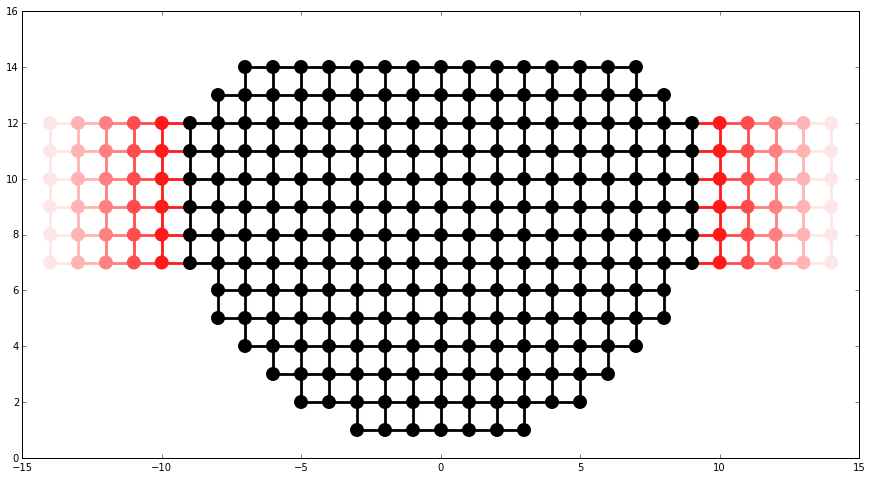

In [10]:
lat, sys = make_system()
lead = make_lead(lat)

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

tsys = sys.finalized()

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
kwant.plot(sys, ax=ax, num_lead_cells=5)

We now create a zero vector defined over this Hilbert space and initialize
it with some values:

In [ ]:
args = (0.5, 1.0)  # (Vg, gamma)
psi = tkwant.wave_packet(tsys, args)  # have to pass the Hamiltonian args as well

ket_up = [1., 0.]  # spin components
ket_down = [0., 1.]

psi[lat(4, 0)] = ket_up
psi[[lat(5, 6), lat(2, 0)]] = ket_down
psi.normalize()

plot_spin_components(tsys, psi)

We can even use syntax similar `kwant.Builder` to fill parts of the vector in one go.
Note that here, however, the function takes a *site* and not a position, as in `kwant.lattice.shape`.

In [ ]:
def circle(site)
    x, y = site.pos
    xc, yc = (0, 8)
    r2 = 3**2  # squared radius
    return (x - xc)**2 + (y - yc)**2 < r2

psi = tkwant.wave_packet(tsys, args)
psi[circle] = ket_up + ket_down
psi.normalize()

plot_spin_components(tsys, psi)

We can even use a function on the right hand side, which will be evaluated for each site specified on the left hand side. In this example we create a bump function wavepacket in the dot.

In [ ]:
def bump(site):
    x, y = site.pos
    xc, yc = (0, 8)  # centre
    r2 = (x - xc)**2 + (y - yc)**2 # squared radius
    if r2 < 5**2
        return ket_up * exp(-1./(1. - r2/5**2))
    else:
        return [0, 0]


psi = tkwant.wave_packet(tsys)
psi[:] = bump
psi.normalize()

plot_spin_components(tsys, psi)

Note that when specifying wavefunctions like this it is important to remember that as we can only formally
specify wavefunctions whos *support is a subset of the central region*, i.e. which are 0 everywhere in the leads.

In order to specify scattering states we can use `tkwant.wave_function` that works analogously to `kwant.wave_function`:

In [ ]:
xi = tkwant.wave_function(tsys, energy=0.5, args=args)

psi_scat = xi(0)[0]  # call with the lead number, index with the mode number, same as Kwant

The advantage of using this method to specify a scattering state is that when
we will look to evolve wavefunctions in time, in [part IV](4_evolving_states.ipynb),
a more efficient algorithm can be used if tkwant knows that the system starts
in an eigenstate.

<div class="alert alert-info" data-toggle="collapse" data-target="#note1">
    <p>**Implementation Note** <i class="pull-right fa fa-chevron-down"></i></p>
    <div id="note1" class="collapse">
        <p>
            We should be able to index the state with all the keys that `kwant.Builder`s can, and 
            in addition, a single `Sites` object (single `SiteFamily` with many tags).
        </p>
        <p>
            We should build an object which is capable of getting/setting slices of some
            underlying array. We will need the same thing when we define densities and currents
            in [part III](3_single_particle_observables.ipynb).
        </p>
    </div>
</div>

We can access the components of the wavefunction on each site by "indexing" the wavefunction with a `Site` object

In [ ]:
print psi[lat(0, 1)]
print psi_scat[lat(4, 5)]

We can even access the raw components on each orbital by accessing the underlying
data structure

In [ ]:
print psi.data[0:2]
print psi_scat.data[5:10]

this is, however, not recommended, as it requires knowledge of the ordering of the
sites and the number of orbitals per site in order to know what orbitals
you are actually looking at.

In the [next tutorial](3_single_particle_observables.ipynb) we shall introduce observables, which provide an interface for extracting useful information from wavefunctions.